Notebook destined to modify the Breast Cancer Dataset used during 1S2024.
- We want to modify this dataset to be unbalanced. Only 20% of cancer samples.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot the target distribution for a given dataset
def plot_target_distribution(file_path, dataset_name):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Count the number of occurrences for each target (0 and 1)
    target_counts = df['target'].value_counts()
    total_samples = len(df)
    
    # Calculate percentage for each class
    target_percentages = (target_counts / total_samples) * 100
    
    # Print the number of samples and percentages for each class
    print(f"Target distribution in {dataset_name}:")
    for target_class, count in target_counts.items():
        percentage = target_percentages[target_class]
        print(f"Class {target_class}: {count} samples ({percentage:.2f}%)")
 
    # Plotting
    plt.figure(figsize=(6,4))
    target_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
    plt.title(f'Target Distribution in {dataset_name}')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
    plt.show()

Target distribution in Train Dataset:
Class 1: 228 samples (61.79%)
Class 0: 141 samples (38.21%)


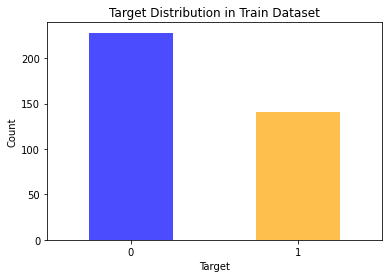

Target distribution in Validation Dataset:
Class 1: 74 samples (64.91%)
Class 0: 40 samples (35.09%)


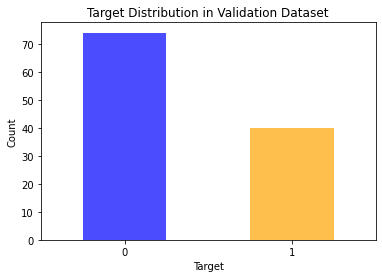

Target distribution in Test Dataset:
Class 1: 55 samples (63.95%)
Class 0: 31 samples (36.05%)


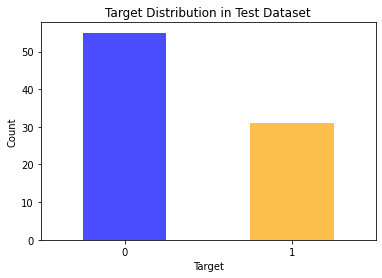

In [2]:
train_file = '/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Balanced(old)/breast_cancer_train.csv'
valid_file = '/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Balanced(old)/breast_cancer_valid.csv'
test_file = '/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Balanced(old)/breast_cancer_test.csv'

# Plot target distribution for each dataset
plot_target_distribution(train_file, 'Train Dataset')
plot_target_distribution(valid_file, 'Validation Dataset')
plot_target_distribution(test_file, 'Test Dataset')

- Let's undersample the minority class a bit more. Pedagogical Goal: Ensure that the task the students will work on highlights the challenges of imbalanced data, such as:
    - Difficulty in achieving high accuracy for minority classes
    - The need for evaluation metrics beyond accuracy (e.g., precision, recall, F1-score, or ROC AUC).
    - Understanding and applying resampling techniques (e.g., oversampling, undersampling, or SMOTE).

By reducing the number of samples in class 0, the dataset becomes more biased toward class 1. This can give students experience in handling situations where traditional models may struggle to identify minority classes, forcing them to implement techniques like cost-sensitive learning or use appropriate metrics to evaluate model performance.

Level of Imbalance: Reducing class 0 to around 20% will create a significant imbalance. In some cases, if the dataset becomes too imbalanced (e.g., 90% vs. 10%), it may be challenging for students to understand if they don't use the right techniques. An imbalance of 70% vs. 30% or 80% vs. 20% is a good starting point for practicing on imbalanced datasets. That is the objective

In [3]:
def undersample_class_0(file_path, target_percentage, output_path):
    df = pd.read_csv(file_path)
    
    class_0 = df[df['target'] == 0]
    class_1 = df[df['target'] == 1]
    
    desired_class_0_samples = int(len(class_1) / ((100 - target_percentage) / target_percentage))
    class_0_undersampled = class_0.sample(n=desired_class_0_samples, random_state=42)
    df_undersampled = pd.concat([class_1, class_0_undersampled])
    # Shuffle the new dataframe
    df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Save the new dataset
    df_undersampled.to_csv(output_path, index=False)
    print(f"Saved undersampled dataset to {output_path}")

In [8]:
# Reduce class 0 to 20% for each dataset and save
undersample_class_0(train_file, target_percentage=23.2, output_path='/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv')
undersample_class_0(valid_file, target_percentage=20.1, output_path='/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb.csv')
undersample_class_0(test_file, target_percentage=21.1, output_path='/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb.csv')

Saved undersampled dataset to /home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv
Saved undersampled dataset to /home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb.csv
Saved undersampled dataset to /home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb.csv


Target distribution in Train Dataset - Imbalanced:
Class 1: 228 samples (77.03%)
Class 0: 68 samples (22.97%)


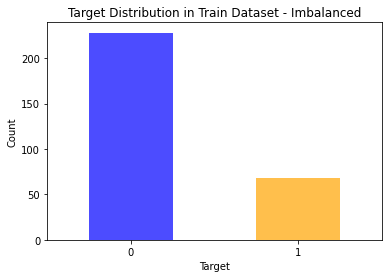

Target distribution in Validation Dataset - Imbalanced:
Class 1: 74 samples (80.43%)
Class 0: 18 samples (19.57%)


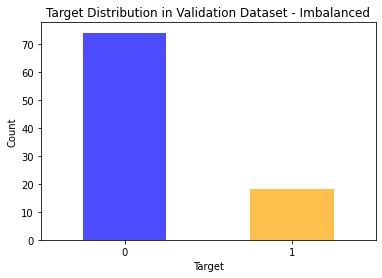

Target distribution in Test Dataset - Imbalanced:
Class 1: 55 samples (79.71%)
Class 0: 14 samples (20.29%)


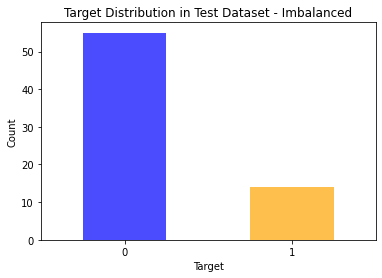

In [9]:
train_file_imb = '/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv'
valid_file_imb = '/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb.csv'
test_file_imb = '/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb.csv'

# Plot target distribution for each dataset
plot_target_distribution(train_file_imb, 'Train Dataset - Imbalanced')
plot_target_distribution(valid_file_imb, 'Validation Dataset - Imbalanced')
plot_target_distribution(test_file_imb, 'Test Dataset - Imbalanced')

Let's check how linearly seperable the two classes are:

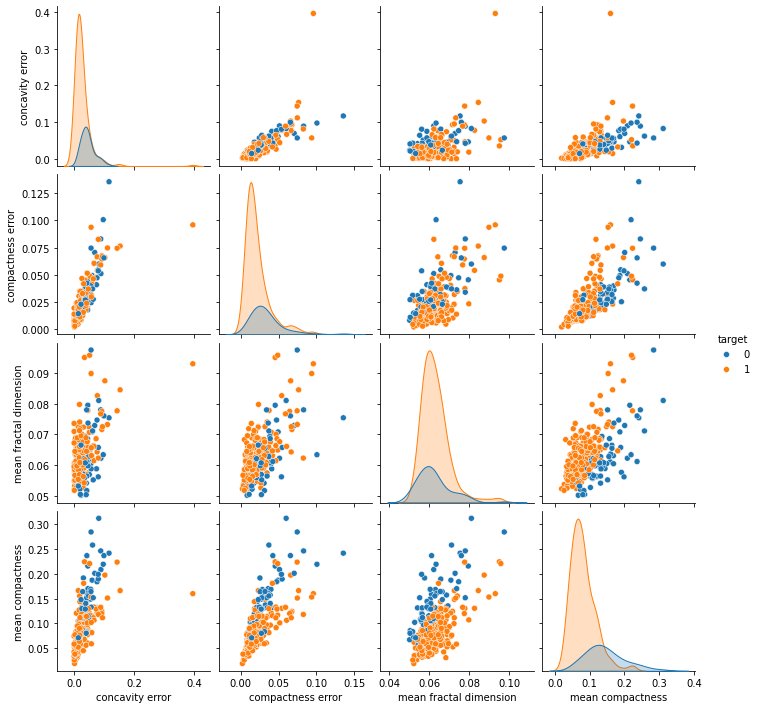

In [20]:
train_df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv")
sns.pairplot(train_df, hue="target", vars = ['concavity error', 'compactness error', 'mean fractal dimension', 'mean compactness'])

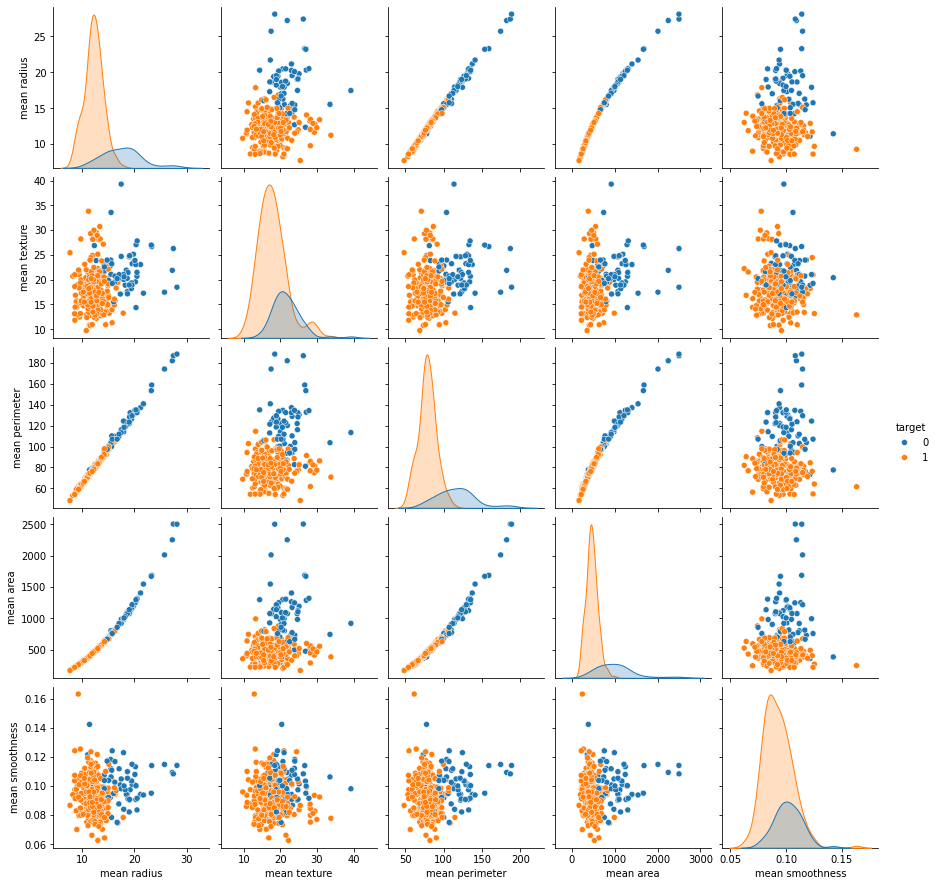

In [1]:
import seaborn as sns
import pandas as pd

train_df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv")
sns.pairplot(train_df, hue="target", vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

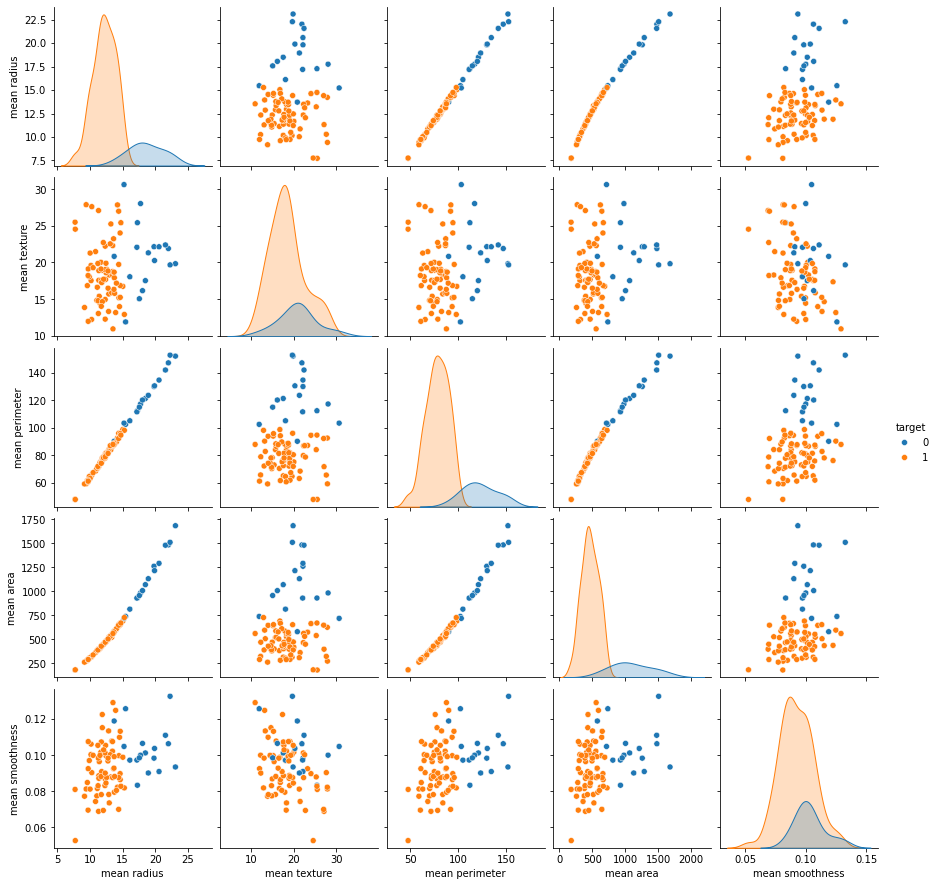

In [5]:
valid_df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb.csv")
sns.pairplot(valid_df, hue="target", vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

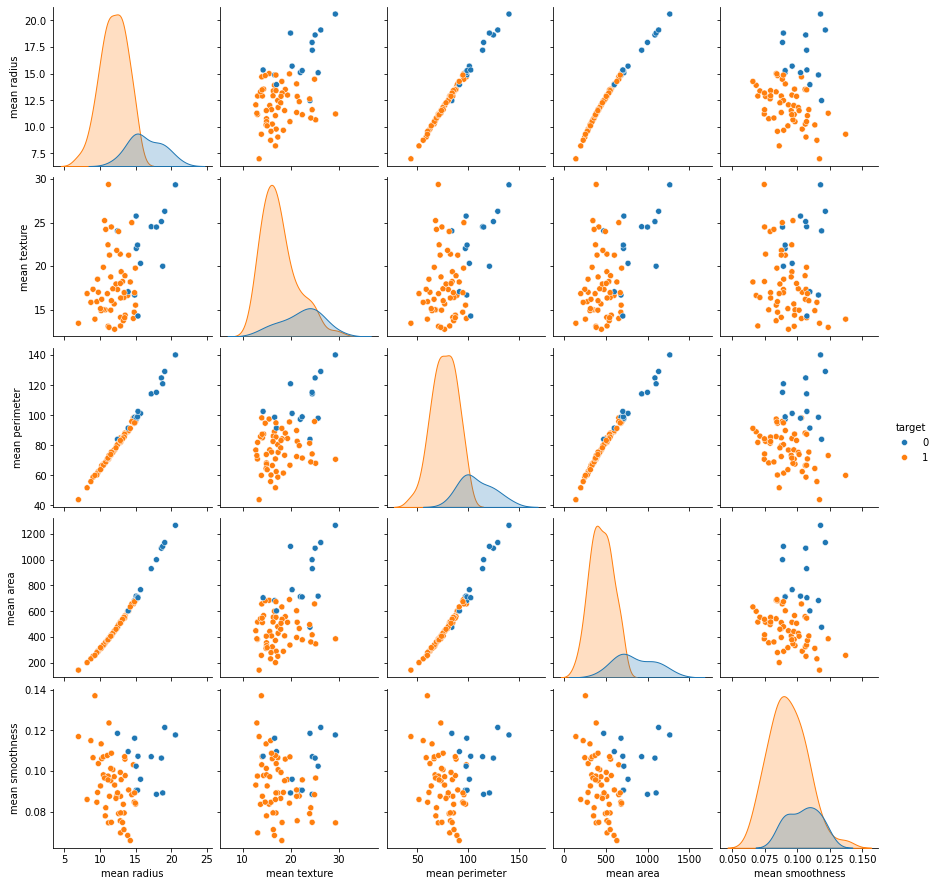

In [6]:
sns.pairplot(train_df, hue="target", vars = ['concavity error', 'compactness error', 'mean fractal dimension', 'mean compactness', 'mean radius', 'mean texture', 'mean perimeter', 'mean area'])

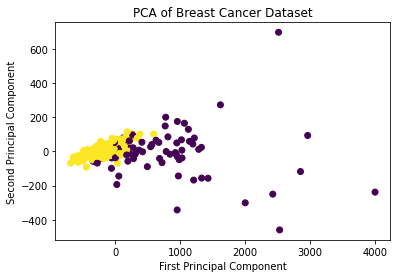

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Reduce to 2 components using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(train_df)

# Plot the PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df["target"], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

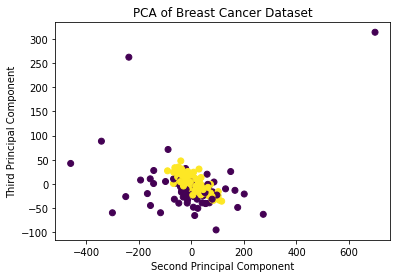

In [17]:
# Plot the PCA components
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=train_df["target"], cmap='viridis')
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

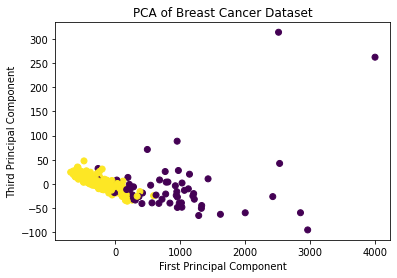

In [18]:
# Plot the PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=train_df["target"], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

## Create imbalanced dataset with less features to make the problem more complex

In [34]:
import pandas as pd

# Define the selected features
#'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'
selected_features = ["mean concavity",'concavity error', "mean compactness",'compactness error', 'mean fractal dimension', "fractal dimension error"]

# Load the original datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb.csv')

# Keep only the selected features and the target column (if applicable)
train_df_selected = train_df[selected_features + ['target']]  # Assuming 'target' is the target column
val_df_selected = val_df[selected_features + ['target']]
test_df_selected = test_df[selected_features + ['target']]

# Save the new CSV files with the reduced features
train_df_selected.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb_red.csv', index=False)
val_df_selected.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb_red.csv', index=False)
test_df_selected.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb_red.csv', index=False)

Option 2: exclude certain features

In [14]:
excluded_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness','concavity error', 'compactness error', 'mean fractal dimension', 'mean compactness', "fractal dimension error", "smoothness error", "concave points error", "mean concave points", "symmetry error", "mean symmetry", "mean concavity", "area error", "perimeter error", "texture error", "radius error" ]

# Load the original datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb.csv')

# Drop the excluded features from each dataframe (while keeping the target column)
train_df_reduced = train_df.drop(columns=excluded_features)
val_df_reduced = val_df.drop(columns=excluded_features)
test_df_reduced = test_df.drop(columns=excluded_features)

# Save the new CSV files with the reduced features
train_df_reduced.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb_red.csv', index=False)
val_df_reduced.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb_red.csv', index=False)
test_df_reduced.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb_red.csv', index=False)

Option 3: Create noisier dataset

In [36]:
import numpy as np
import pandas as pd

# Load the original datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb_red.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb_red.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb_red.csv')

# Define the noise level
noise_level = 0.05  # Adjust this value to control the noise level

# Function to add Gaussian noise to a dataframe
def add_gaussian_noise(df, noise_level):
    noisy_df = df.copy()
    features = noisy_df.columns.difference(['target'])  # Assuming 'target' is the target column
    for feature in features:
        noise = np.random.normal(0, noise_level, size=df[feature].shape)
        noisy_df[feature] += noise
    return noisy_df

# Add noise to each dataframe
train_df_noisy = add_gaussian_noise(train_df, noise_level)
val_df_noisy = add_gaussian_noise(val_df, noise_level)
test_df_noisy = add_gaussian_noise(test_df, noise_level)

# Save the new CSV files with added noise
train_df_noisy.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_imb_noisy.csv', index=False)
val_df_noisy.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_imb_noisy.csv', index=False)
test_df_noisy.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_imb_noisy.csv', index=False)

## Crear dev set (unir train y val)

In [2]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_2s2024.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_2s2024.csv')

# Concatenate the datasets
dev_df = pd.concat([train_df, val_df], ignore_index=True)

# Save the combined dataset to a new CSV file
dev_df.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/Final/breast_cancer_dev.csv', index=False)

print("Datasets have been successfully combined into 'breast_cancer_dev_2s2024.csv'.")

Datasets have been successfully combined into 'breast_cancer_dev_2s2024.csv'.


In [3]:
dev_df = dev_df.drop(columns=['Unnamed: 0'])

# Save the modified dataset to a new CSV file
dev_df.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/Final/breast_cancer_dev.csv', index=False)

In [5]:
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/Final/breast_cancer_test.csv')

test_df = test_df.drop(columns=['Unnamed: 0'])

test_df.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/Final/breast_cancer_test.csv', index=False)